In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

In [4]:
# Preproccessing Weather data

# Load your preprocessed dataset
weather_data = pd.read_csv('../dataset/filtered_climate_data.csv')

# Fill NaN values with the mean of each column
weather_data.fillna(weather_data.select_dtypes(include=np.number).mean(), inplace=True)

# Select relevant features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']
selected_data = weather_data[features]

# Handle non-numeric columns (if any other non-numeric columns exist)
selected_data = selected_data.select_dtypes(include=['number'])

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=selected_data.columns)

# Define features and target variable
X = scaled_df.drop(columns=['Tavg'])  # Features
y = scaled_df['Tavg']  # Target variable

# Split the data (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the first few rows of your preprocessed dataset
weather_data.head(1000000)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,2018-01-01,23.0,29.4,26.6,87.0,49.500000,0.0,8.0,120.0,4.0,SE,96001
1,2018-01-02,22.6,28.8,25.9,90.0,70.500000,5.5,6.0,120.0,3.0,E,96001
2,2018-01-03,22.8,28.2,24.8,93.0,28.300000,2.0,8.0,130.0,5.0,SE,96001
3,2018-01-04,23.6,30.2,25.8,90.0,28.800000,0.0,6.0,130.0,3.0,SE,96001
4,2018-01-05,23.2,29.2,26.0,88.0,8.648519,4.0,4.0,160.0,0.0,N,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
172697,2020-12-27,25.2,31.2,29.2,74.0,0.000000,1.4,4.0,280.0,2.0,C,97980
172698,2020-12-28,25.3,31.6,28.1,78.0,8.648519,3.0,12.0,260.0,2.0,C,97980
172699,2020-12-29,24.6,32.3,28.4,81.0,8.648519,6.5,5.0,260.0,2.0,SW,97980
172700,2020-12-30,25.2,32.6,28.4,80.0,0.000000,2.4,7.0,260.0,2.0,C,97980


c:\Users\Raffi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         9,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,893 (38.64 KB)

 Trainable params: 9,893 (38.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.0351e-04 - val_loss: 5.5990e-05
Epoch 2/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.0127e-05 - val_loss: 4.9765e-05
Epoch 3/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5.8192e-05 - val_loss: 4.9248e-05
Epoch 4/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.5952e-05 - val_loss: 4.7771e-05
Epoch 5/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.4474e-05 - val_loss: 4.7568e-05
Epoch 6/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.2666e-05 - val_loss: 4.7295e-05
Epoch 7/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.3473e-05 - val_loss: 4.7027e-05
Epoch 8/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.1247e-05 - val_loss: 4.6204e-05
Epoch 9/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.9888e-05 - val_loss: 4.6620e-05
Epoch 10/50
4318/4318 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.3427e-05 - val_loss: 4.9175e-05
Epoch 11/50
4318/4318 ━━━━━━━━━━━━━

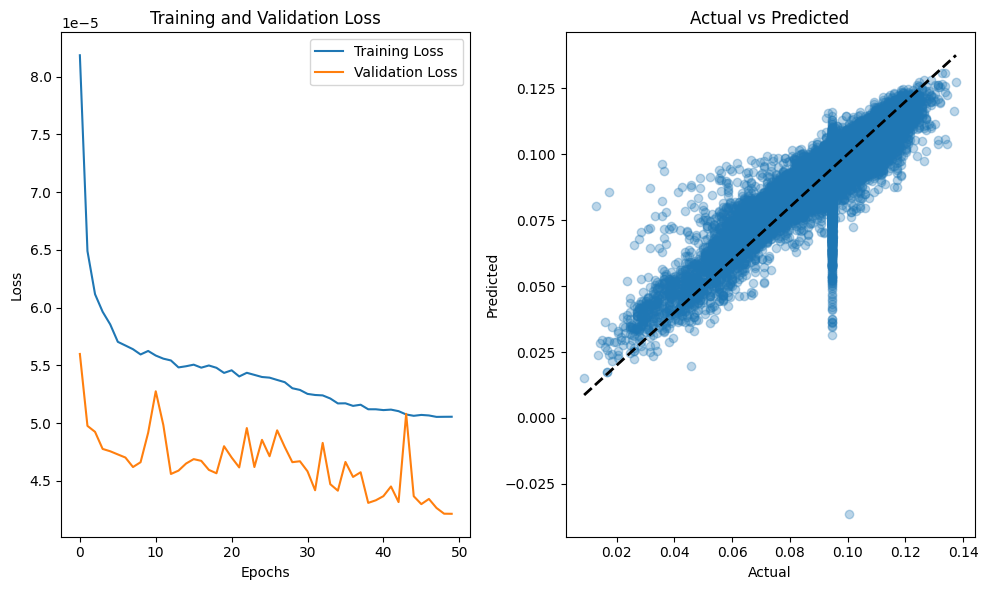

In [5]:
# CNN Model Weather Data
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) score: {r2}")

# Plot training history
plt.figure(figsize=(10, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot predicted vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.tight_layout()

plt.show()